# Accessing Test Plans Results

In [2]:
# Load dotenv extension for environment variables
%load_ext dotenv
# Tell dotenv to read the dev.env file
%dotenv dev.env
# Disable test plan summarization for this notebook 
%env VM_SUMMARIZE_TEST_PLANS False

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv
env: VM_SUMMARIZE_TEST_PLANS=False


It is possible to access all the test results for a test plan when it has finished executing. This allows inspecting the results of each test, whether it is a metric, a threshold test or a figure, and the results of subtest plans if they exist.

In this notebook we'll run the timeseries test plan on a demo dataset and inspect the results.

In [3]:
# ML libraries
import pandas as pd

# ValidMind libraries 
import validmind as vm

%matplotlib inline

We load the dataset as usual:

In [5]:
df = pd.read_csv("./datasets/lending_club_loan_rates.csv", sep='\t')
df = df.rename(columns={'Unnamed: 0': 'Date'})
df = df.set_index(pd.to_datetime(df['Date']))
df.drop(["Date"], axis=1, inplace=True)

# Remove diff columns
columns_to_remove = [col for col in df.columns if col.startswith("diff")]
df = df.drop(columns=columns_to_remove)
df.head()

,loan_rate_A,loan_rate_B,loan_rate_C,loan_rate_D,FEDFUNDS
Date,,,,,
2007-08-01,7.766667,9.497692,10.947500,12.267000,5.02
2007-09-01,7.841429,9.276667,10.829167,12.436667,4.94
2007-10-01,7.830000,9.433333,10.825926,12.737368,4.76
2007-11-01,7.779091,9.467778,10.967037,12.609444,4.49
2007-12-01,7.695833,9.387500,10.805000,12.478889,4.24


In [6]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  project = "clgyd137o0000pi8hcn9oukz7"
)

True

## Run a sample test plan

Initialize the VM dataset:

In [7]:
target_variables = ["loan_rate_A", "loan_rate_B", "loan_rate_C", "loan_rate_D"]

vm_dataset = vm.init_dataset(
    dataset=df,
    target_column = target_variables   
)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Run the "timeseries" test plan:

In [11]:
loan_rate_columns = ["loan_rate_A", "loan_rate_B", "loan_rate_C", "loan_rate_D"]

test_plan_config = {
    "time_series_univariate_inspection_raw": {
        "columns": loan_rate_columns
    },
    "time_series_univariate_inspection_histogram": {
        "columns": loan_rate_columns
    }
}

timeseries_plan = vm.run_test_plan(
    "timeseries",
    config=test_plan_config,    
    test_ds=vm_dataset,
    train_ds=vm_dataset,
    dataset=vm_dataset,
)

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

The test statistic is outside of the range of p-values available in the


## Accessing the test plan results

We can now access all the results of the test plan, including subtest plans using `test_plan.get_results()`.

- `test_plan.get_results()`: With no arguments, this returns a list of all results
- `test_plan.get_results(test_id)`: If provided with a test id, this returns the all results that match the given test id

By default, get_results() returns a list, in case there are multiple tests with the same id.

In [12]:
timeseries_plan.get_results()

[TestPlanMetricResult(result_id="time_series_univariate_inspection_histogram", figures),
 TestPlanMetricResult(result_id="time_series_univariate_inspection_raw", figures),
 TestPlanMetricResult(result_id="seasonal_decompose", metric, figures),
 TestPlanMetricResult(result_id="seasonality_detection_with_acf_and_pacf", metric, figures)]

In [13]:
seasonal_decomposition = timeseries_plan.get_results("seasonal_decompose")[0]
seasonal_decomposition

TestPlanMetricResult(result_id="seasonal_decompose", metric, figures)


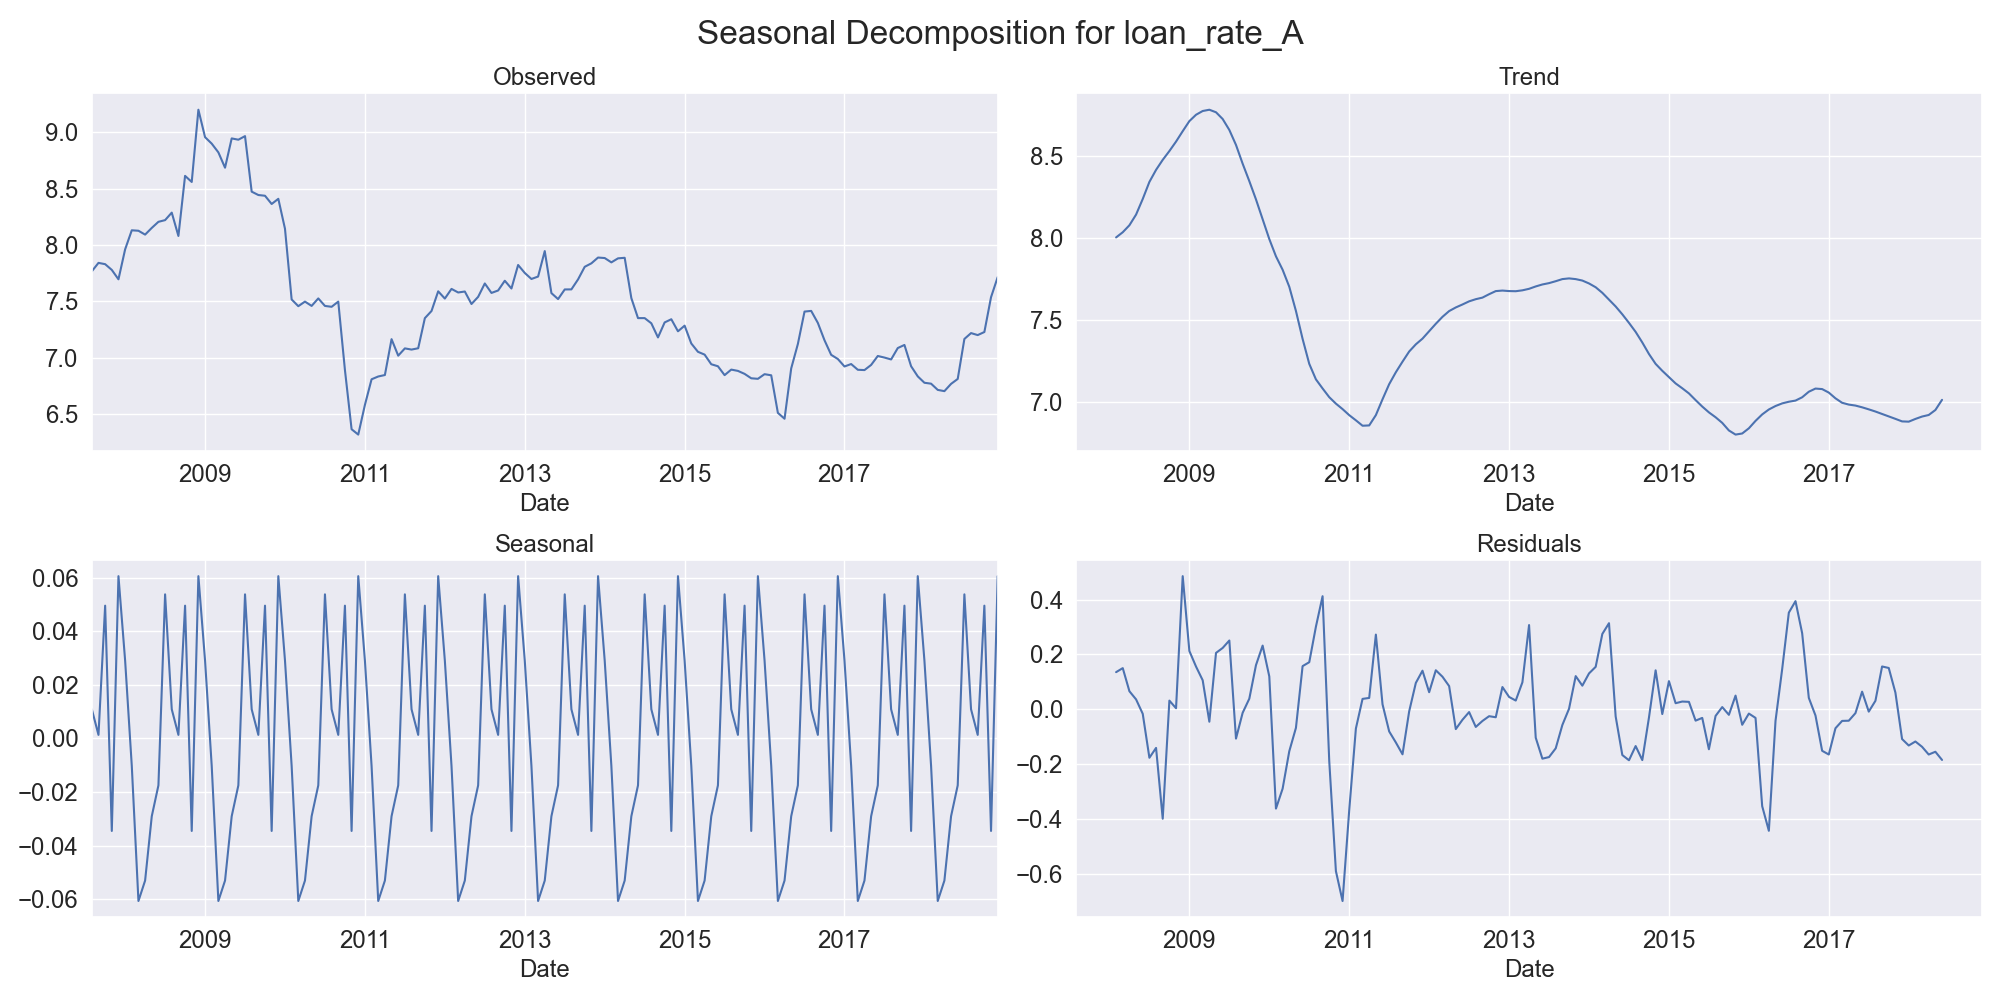
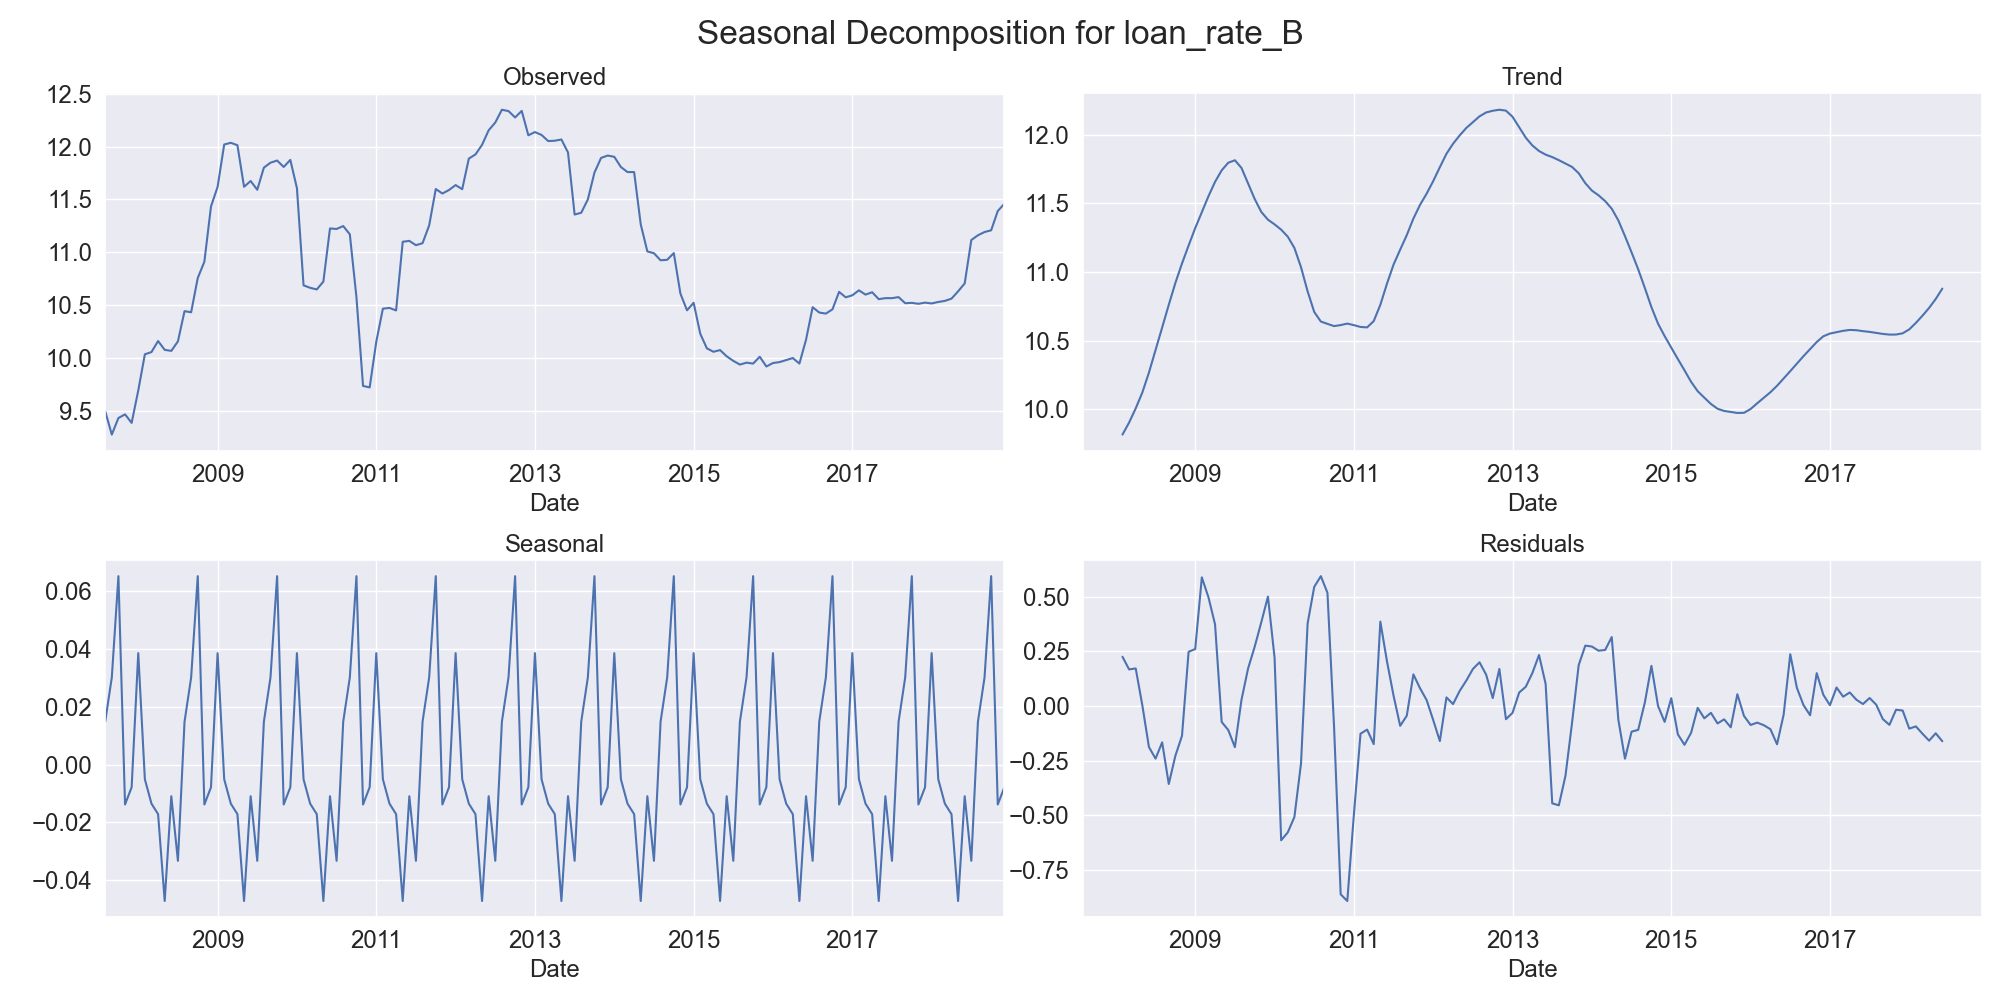
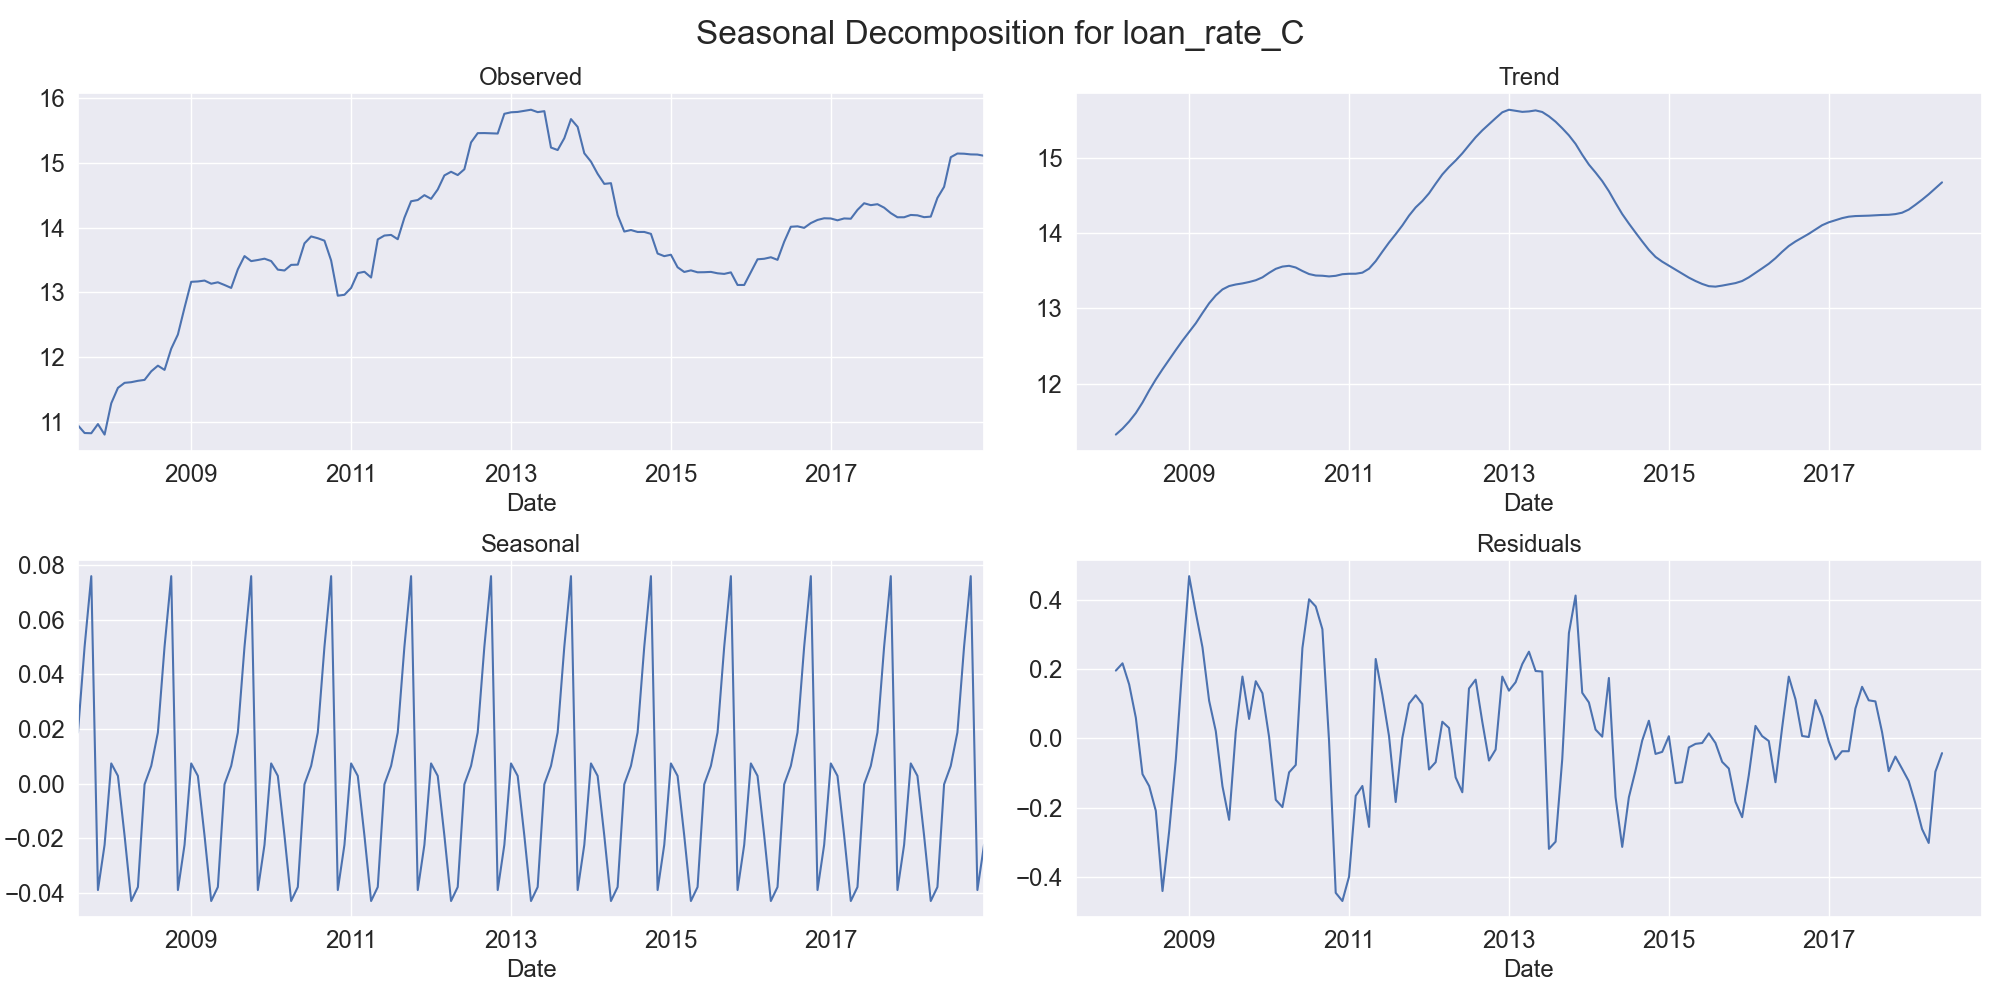
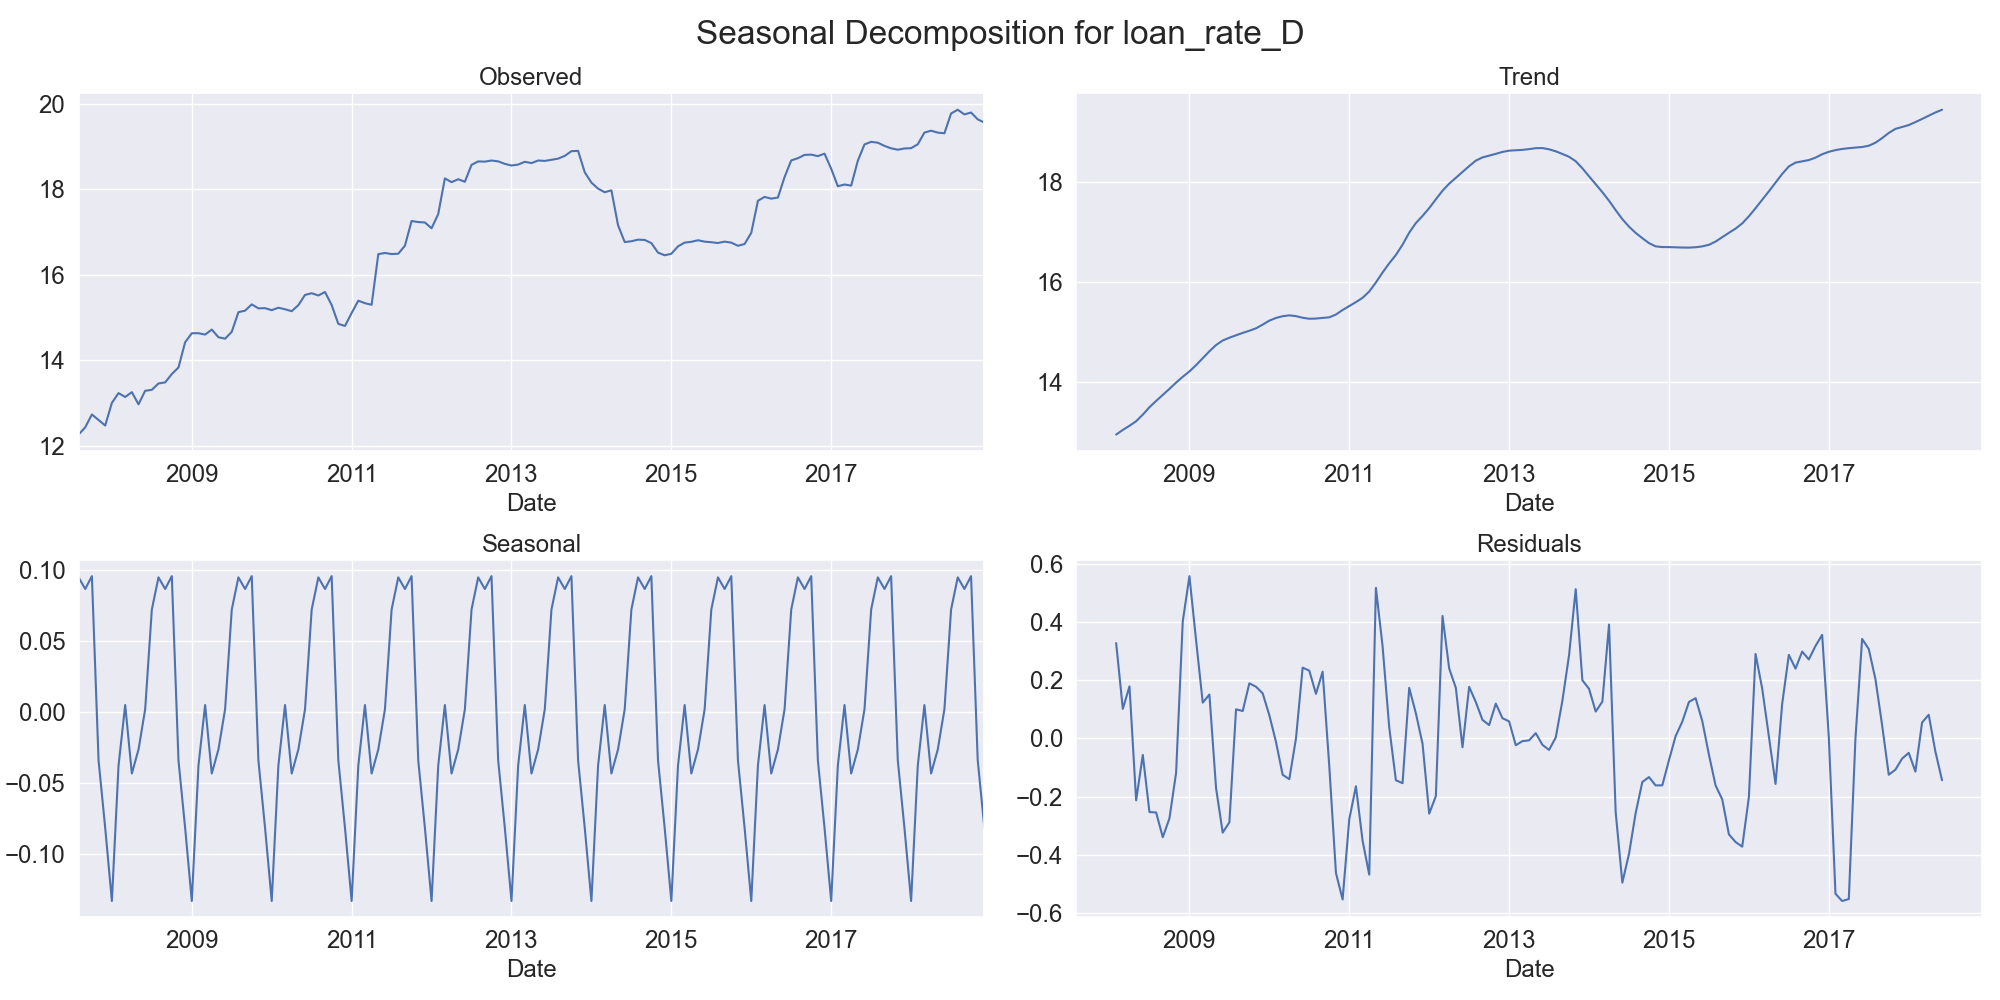
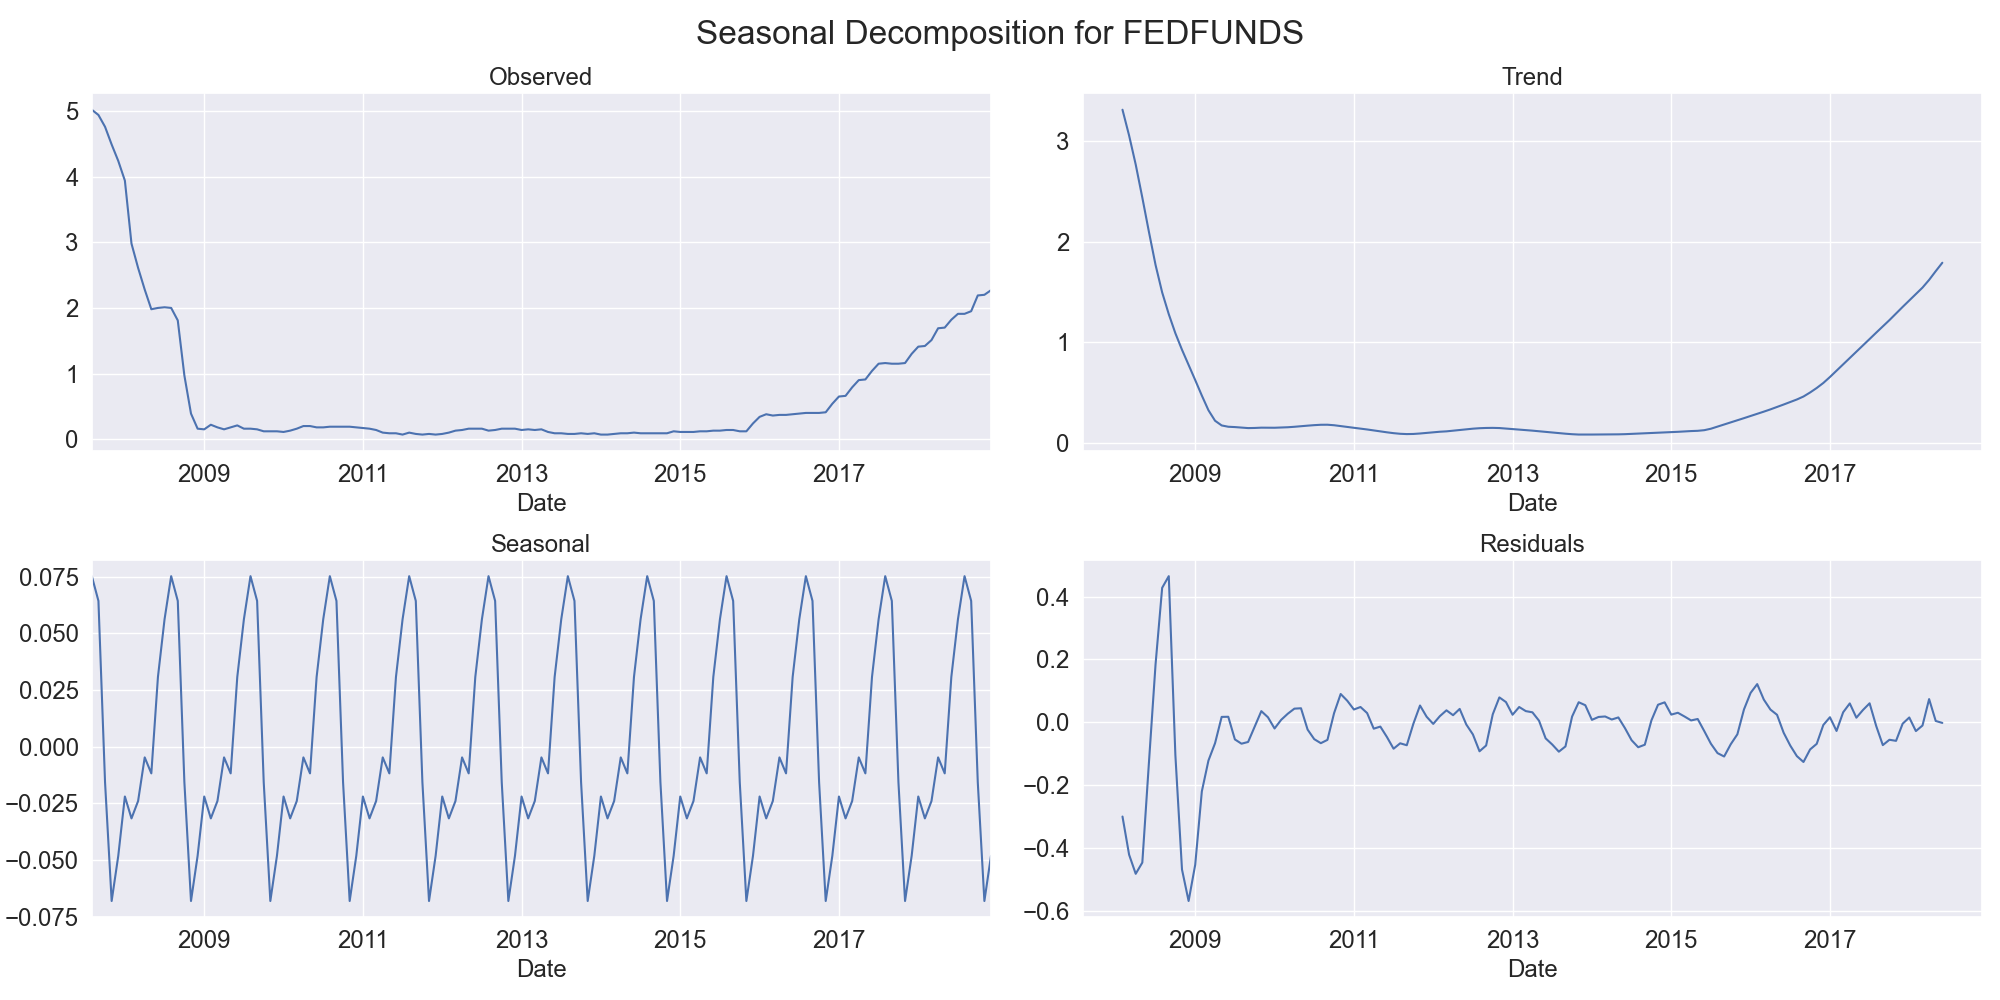

In [14]:
seasonal_decomposition.show()

In [17]:
seasonal_decomposition.metric.value["loan_rate_A"][0:5]

[{'Date': '2007-08-01',
  'loan_rate_A': 7.7666666666666675,
  'trend': nan,
  'seasonal': 0.010868499397109575,
  'resid': nan},
 {'Date': '2007-09-01',
  'loan_rate_A': 7.841428571428572,
  'trend': nan,
  'seasonal': 0.0013181145386968443,
  'resid': nan},
 {'Date': '2007-10-01',
  'loan_rate_A': 7.83,
  'trend': nan,
  'seasonal': 0.04951104761291364,
  'resid': nan},
 {'Date': '2007-11-01',
  'loan_rate_A': 7.779090909090908,
  'trend': nan,
  'seasonal': -0.034519089222105774,
  'resid': nan},
 {'Date': '2007-12-01',
  'loan_rate_A': 7.695833333333333,
  'trend': nan,
  'seasonal': 0.06051880355383553,
  'resid': nan}]